# Predicting Used Car Prices: A Data Science Exploration

## Introduction

Welcome to this interactive exploration in our Jupyter notebook where we will traverse the intricate landscape of used car prices. As data scientists, our task is to scrutinize, analyze, and interpret complex datasets, teasing out the hidden patterns and underlying structures within the data.

In this notebook, we'll dive into a dataset that captures a diverse spectrum of used car features along with their associated prices. From brand, model, and age to more granular details like mileage and condition, this dataset provides an exciting opportunity to investigate the multifaceted world of used cars.

Our objective here is twofold. Firstly, we aim to gain a deep understanding of our data - its characteristics, distributions, and inherent relationships. Secondly, we aspire to leverage this understanding to build a predictive model that can accurately estimate the price of a used car based on its features.

This journey will involve a variety of techniques and processes central to the field of data science, including but not limited to:

- **Data Understanding and Exploration:** Through Exploratory Data Analysis (EDA), we will familiarize ourselves with the dataset, identify patterns, and generate hypotheses about potential relationships in the data.

- **Data Preparation:** We will clean the data, handle missing values, and perform necessary transformations to prepare it for modeling. This step may also include feature engineering, where we create new variables from existing ones to enhance our model's predictive power.

- **Modeling:** We'll apply suitable machine learning algorithms to the data to construct a predictive model. We will iterate over different models, tune hyperparameters, and assess their performance to select the best model.

- **Evaluation and Validation:** The performance of our model will be evaluated using suitable metrics and validation techniques to ensure its reliability and robustness.

It's essential to remember that data science is not a linear process, but rather an iterative one. Throughout our journey, we may loop back to earlier steps based on what we learn from subsequent stages.

So, without further ado, let's dive into this data science expedition, and uncover the story that lies within our used car prices dataset!

Let's read the data

In [2]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/cars.csv.zip')

Generally, the first thing is always to take a look at the dataset, to get an idea of what the features are like, and what it looks like.

In [3]:
df.sample(10)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
116209,Chevrolet,Spark 1LT,2014,69120.0,1.2L I4 16V MPFI DOHC,Automatic CVT,Front-wheel Drive,Gasoline,30-39,Silver Ice Metallic,Silver,0.0,0.0,0.0,Excalibur Auto Group Inc,4.3,4.0,111.0,NaN,9837.0
641723,Subaru,Impreza 2.5 i Premium,2010,106588.0,"2.5L H-4 variable valve control, engine with 1...",4-Speed Shiftable Automatic,All-wheel Drive,Gasoline,20-26,Satin White Pearl,Ivory,0.0,0.0,0.0,Liberty Motors,NaN,4.4,38.0,NaN,8471.0
684488,Toyota,4Runner TRD Pro,2019,72359.0,4.0L,5 Speed Elect Controled Auto Transmission,NaN,Gasoline,NaN,ICE CAP,LF22,0.0,1.0,1.0,Beaman Toyota,2.6,4.8,190.0,210.0,47770.0
370218,INFINITI,Q50 3.0t LUXE,2019,104694.0,3.0L V6 24V GDI DOHC Twin Turbo,7-Speed Automatic,Rear-wheel Drive,Gasoline,20-29,Pure White,Black,0.0,0.0,0.0,Ocean Auto Sales,NaN,4.6,34.0,NaN,26450.0
123078,Chevrolet,Silverado 1500 LT Trail Boss,2023,4338.0,6.2L V8 16V GDI OHV,Automatic,Four-wheel Drive,Gasoline,NaN,Sterling Gray Metallic,Jet Black,0.0,1.0,1.0,WHITEWATER CDJR,NaN,5.0,1.0,200.0,66000.0
600222,Nissan,Murano SL,2019,77652.0,3.5L V6 24V MPFI DOHC,Automatic CVT,All-wheel Drive,Gasoline,20-28,White,Graphite,0.0,1.0,1.0,Vision Nissan of Canandaigua,1.3,4.9,97.0,NaN,25400.0
710233,Toyota,Prius Two,2014,69269.0,1.8L I4 16V MPFI DOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,51-48,Classic Silver Metallic,Misty Gray,1.0,0.0,1.0,AutoNation Buick GMC Henderson,4.6,4.5,105.0,662.0,16994.0
756272,Volvo,XC40 T5 R-Design,2021,5045.0,I-4 cyl,Automatic with Geartronic,All-wheel Drive,Gasoline,NaN,Fusion Red,Charcoal,0.0,1.0,0.0,Dick Dyer & Associates,NaN,4.7,35.0,1000.0,39989.0
145135,Chevrolet,Colorado WT,2020,44636.0,3.6L V6 24V GDI DOHC,8-Speed Automatic,Four-wheel Drive,Gasoline,17-24,Kinetic Blue,Jet Black / Dark Ash,0.0,0.0,0.0,West Herr Chevrolet of Williamsville,4.8,4.4,55.0,600.0,30944.0
694004,Toyota,Camry Solara Sport,2008,158000.0,3.3L V6 24V MPFI DOHC,5-Speed Automatic,Front-wheel Drive,Gasoline,18-26,Blizzard Pearl,Charcoal,0.0,0.0,1.0,South Valley Auto Wholesale,NaN,4.9,51.0,NaN,8990.0


## Exploratory Data Analisys - EDA

First, some easy checks to inspect the values

In [5]:
df.describe().T.map('{:.2f}'.format)

,count,mean,std,min,25%,50%,75%,max
year,762091.00,2017.79,5.11,1915.00,2016.00,2019.00,2021.00,2024.00
mileage,761585.00,55781.69,43557.88,0.00,23287.00,45596.00,78365.00,1119067.00
accidents_or_damage,737879.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
one_owner,730608.00,0.56,0.50,0.00,0.00,1.00,1.00,1.00
personal_use_only,737239.00,0.66,0.47,0.00,0.00,1.00,1.00,1.00
seller_rating,548118.00,4.16,0.81,1.00,3.80,4.50,4.70,5.00
driver_rating,730459.00,4.62,0.28,1.00,4.50,4.70,4.80,5.00
driver_reviews_num,762091.00,89.55,115.08,0.00,14.00,51.00,119.00,1025.00
price_drop,410112.00,1007.47,1375.12,100.00,380.00,642.00,1007.00,170995.00
price,762091.00,36488.98,1984183.26,1.00,19583.00,27989.00,39488.00,1000000000.00


In [6]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
manufacturer,762091,30,Ford,79526
model,762091,12187,Fusion SE,3172
engine,747041,6903,2.0L I4 16V GDI DOHC Turbo,75545
transmission,752187,1313,6-Speed Automatic,148597
drivetrain,740529,33,Front-wheel Drive,241432
fuel_type,739164,36,Gasoline,644644
mpg,620020,865,19-26,16210
exterior_color,753232,7681,Black,60250
interior_color,705116,4679,Black,286298
seller_name,753498,18254,Gateway Classic Cars,1638


In [7]:
df.isnull().sum()/len(df)

manufacturer           0.000000
model                  0.000000
year                   0.000000
mileage                0.000664
engine                 0.019748
transmission           0.012996
drivetrain             0.028293
fuel_type              0.030084
mpg                    0.186423
exterior_color         0.011625
interior_color         0.074761
accidents_or_damage    0.031770
one_owner              0.041311
personal_use_only      0.032610
seller_name            0.011276
seller_rating          0.280771
driver_rating          0.041507
driver_reviews_num     0.000000
price_drop             0.461860
price                  0.000000
dtype: float64

The most striking thing is undoubtedly the enormous dispersion in the price, our "main" variable. It seems to have some incorrectly loaded or erroneous values (especially due to that value of 1,000,000,000).

Let's check the tail of the distribution

In [8]:
print(f"Percentil 95: {np.percentile(df['price'], q=95)}")
print(f"Percentil 99: {np.percentile(df['price'], q=99)}")
print(f"Percentil 99.3: {np.percentile(df['price'], q=99.3)}")
print(f"Percentil 99.5: {np.percentile(df['price'], q=99.5)}")
print(f"Percentil 99.8: {np.percentile(df['price'], q=99.8)}")
print(f"Percentil 99.9: {np.percentile(df['price'], q=99.9)}")

Percentil 95: 68846.0
Percentil 99: 109995.0
Percentil 99.3: 124900.0
Percentil 99.5: 139990.0
Percentil 99.8: 198982.79999999795
Percentil 99.9: 239995.91000000003


Now, if we filter the dataset, we see

In [10]:
upper_limit = np.percentile(df['price'], q=99.9)

df[df['price']<upper_limit].describe().T.map('{:.2f}'.format)

,count,mean,std,min,25%,50%,75%,max
year,761328.00,2017.79,5.09,1915.00,2016.00,2019.00,2021.00,2024.00
mileage,760824.00,55830.97,43548.80,0.00,23347.00,45642.00,78410.00,1119067.00
accidents_or_damage,737148.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
one_owner,729941.00,0.56,0.50,0.00,0.00,1.00,1.00,1.00
personal_use_only,736522.00,0.66,0.47,0.00,0.00,1.00,1.00,1.00
seller_rating,547686.00,4.16,0.81,1.00,3.80,4.50,4.70,5.00
driver_rating,729934.00,4.62,0.28,1.00,4.50,4.70,4.80,5.00
driver_reviews_num,761328.00,89.63,115.11,0.00,14.00,51.00,119.00,1025.00
price_drop,409708.00,999.20,1282.36,100.00,380.00,640.00,1006.00,79909.00
price,761328.00,32217.97,20408.13,1.00,19555.00,27988.00,39400.00,239995.00


In [11]:
df[df['price']<upper_limit].select_dtypes(include='object').describe().T

,count,unique,top,freq
manufacturer,761328,30,Ford,79480
model,761328,12137,Fusion SE,3172
engine,746320,6873,2.0L I4 16V GDI DOHC Turbo,75540
transmission,751446,1310,6-Speed Automatic,148595
drivetrain,739840,33,Front-wheel Drive,241425
fuel_type,738450,36,Gasoline,643961
mpg,619501,865,19-26,16210
exterior_color,752488,7647,Black,60143
interior_color,704432,4651,Black,285916
seller_name,752753,18249,Gateway Classic Cars,1635


We still see a very high dispersion, so we can plot to understand a little more. Even though we're only looking at the price, remember that it's our main variable.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

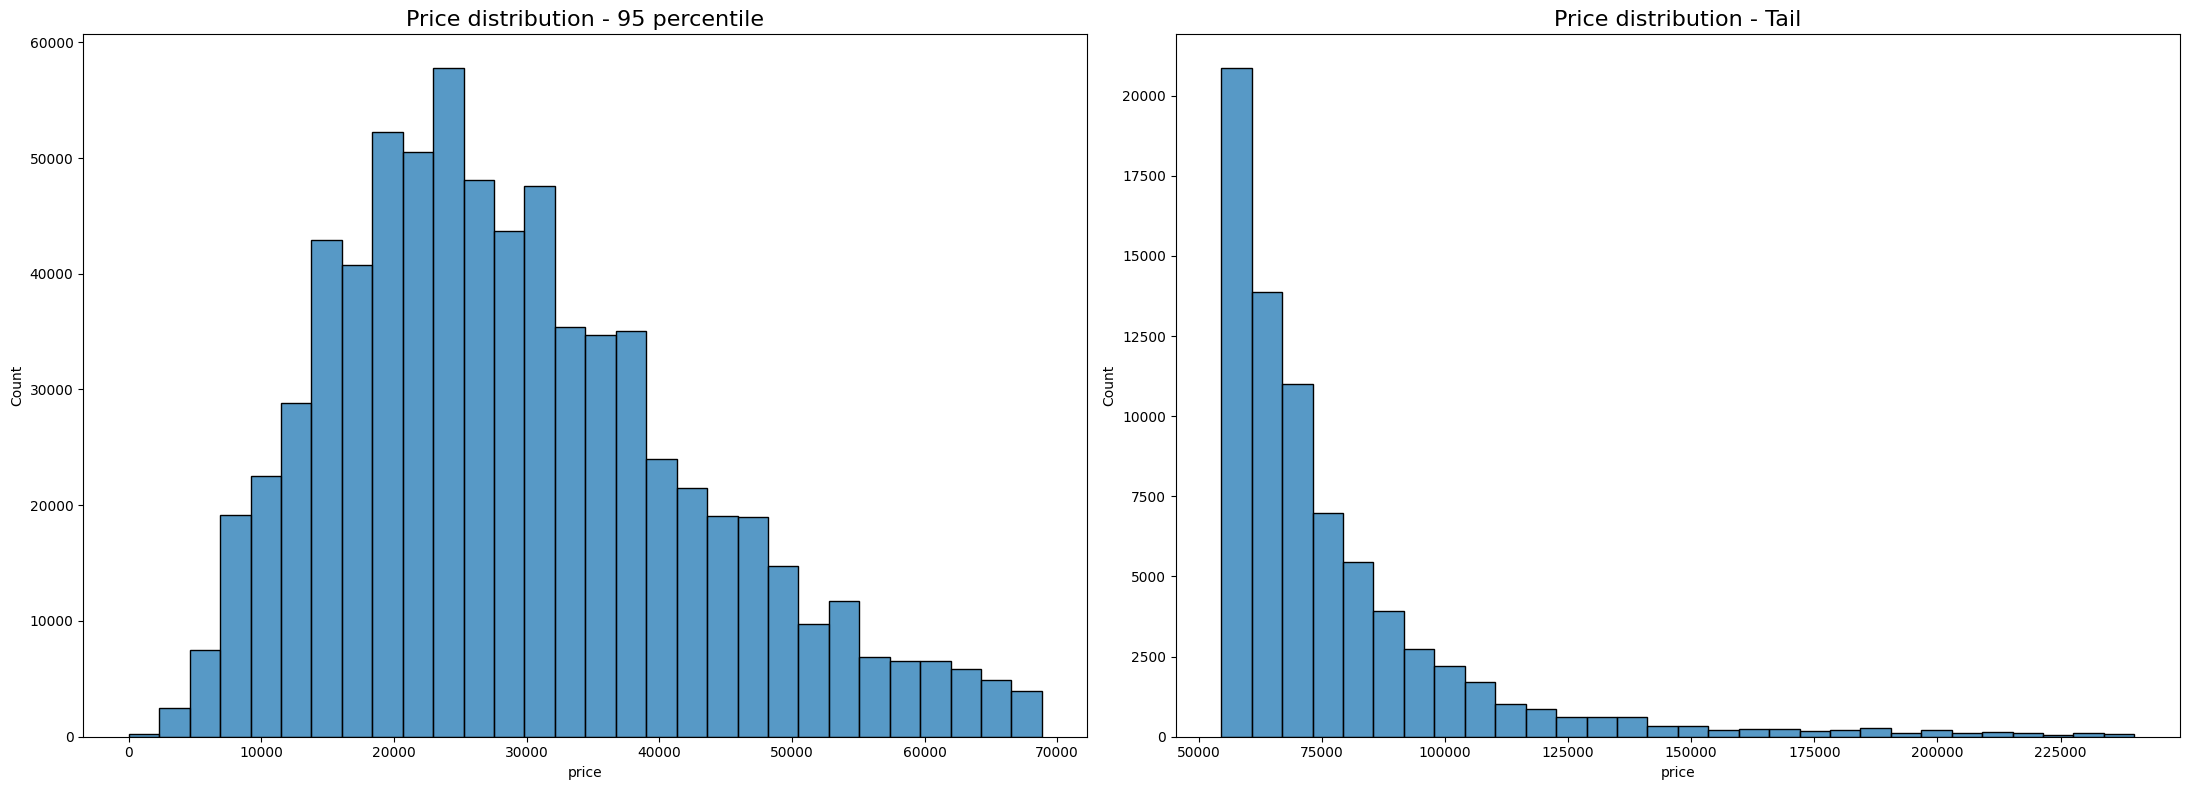

In [4]:
price_90 = np.percentile(df['price'], q=90)
price_95 = np.percentile(df['price'], q=95)
price_99_9 = np.percentile(df['price'], q=99.9)

data_95 = df.loc[df['price']<price_95, ['price']]
data_95.reset_index(inplace=True, drop=True)

data_tail = df.loc[df['price'].between(price_90,price_99_9), ['price']]
data_tail.reset_index(inplace=True, drop=True)

fig, axes = plt.subplots(1, 2, figsize=(22, 8)) 

sns.histplot(data=data_95, x='price', ax=axes[0], bins=30) 
axes[0].set_title(f'Price distribution - 95 percentile', fontsize=16)

sns.histplot(data=data_tail, x='price', ax=axes[1], bins=30) 
axes[1].set_title(f'Price distribution - Tail', fontsize=16)

plt.tight_layout()
plt.show()

So, we are going to work just with the prices below 150.000

In [5]:
df = df[df['price']<price_95]
df.reset_index(drop=True, inplace=True)

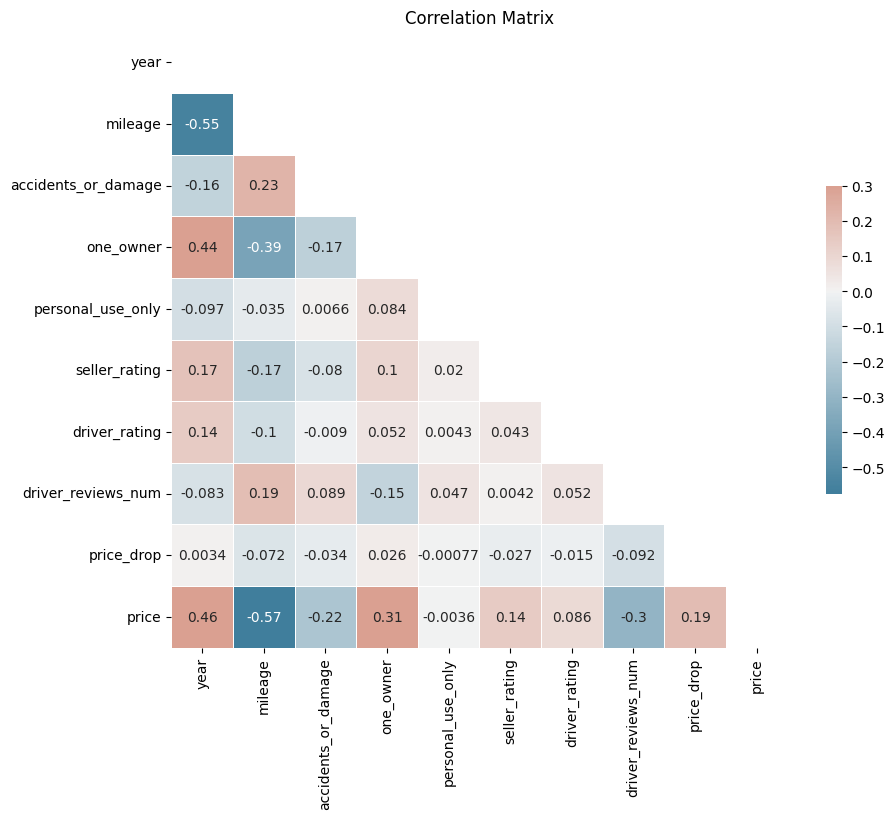

In [6]:
# Compute the correlation matrix
corr = df.select_dtypes(exclude='object').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Matrix")

plt.show()

Now, we can explore the categorical features. First check the first values of each category

In [7]:
for i in df.select_dtypes(include='object').columns:
    vals = round(df[i].value_counts(normalize=True)[:15].sum(),4)
    print(f'Column: {i}, total in the first 10 values: {vals}','\n', '')
    print(df[i].value_counts()[:15])
    print('************','\n')

Column: manufacturer, total in the first 10 values: 0.7738 
 
manufacturer
Ford             74946
Toyota           58783
Chevrolet        52817
Nissan           48361
Jeep             40735
Honda            37602
Kia              35062
Mercedes-Benz    34845
BMW              34217
GMC              26008
Subaru           24758
Volkswagen       24614
Dodge            24524
Hyundai          22202
Lexus            20774
Name: count, dtype: int64
************ 

Column: model, total in the first 10 values: 0.0535 
 
model
Fusion SE              3171
Sportage LX            2873
Corolla LE             2836
GLC 300 Base 4MATIC    2717
Sentra SV              2652
Optima LX              2650
Explorer XLT           2542
Rogue SV               2526
Sorento LX             2461
Tundra SR5             2456
Odyssey EX-L           2390
RX 350 Base            2385
Forte LXS              2377
Wrangler Sport         2363
Focus SE               2353
Name: count, dtype: int64
************ 

Column: engine, t

## Frist Model

Transformation of some columns

In [8]:
df['drivetrain'].value_counts()

drivetrain
Front-wheel Drive                                              241301
All-wheel Drive                                                217043
Four-wheel Drive                                               141643
Rear-wheel Drive                                                90598
FWD                                                              6449
AWD                                                              3443
4WD                                                              1768
RWD                                                              1676
All-Wheel Drive                                                   120
Front-Wheel Drive                                                 104
Unknown                                                            86
Front-Wheel Drive with Limited-Slip Differential                   44
Four-Wheel Drive with Locking and Limited-Slip Differential        42
All-Wheel Drive with Locking and Limited-Slip Differential         33
Rear-Whee

In [9]:
dive_train_map = {'Front-wheel Drive':'front_wheel_drive',
                          'FWD':'front_wheel_drive',
                          'Front-Wheel Drive':'front_wheel_drive',
                          'Four-wheel Drive':'four_wheel_drive',
                          'Four-Wheel Drive':'four_wheel_drive',
                          'Four Wheel Drive':'four_wheel_drive',
                          '4WD':'four_wheel_drive',
                          'All-wheel Drive':'all_wheel_drive',
                          'All-Wheel Drive':'all_wheel_drive',
                          'AWD':'all_wheel_drive',
                          'Rear-wheel Drive':'rear_wheel_drive',
                          'RWD':'rear_wheel_drive'}

df['drivetrain'].map(dive_train_map).fillna(value='others').value_counts(normalize=True)

drivetrain
front_wheel_drive    0.342346
all_wheel_drive      0.304710
four_wheel_drive     0.198143
rear_wheel_drive     0.127453
others               0.027347
Name: proportion, dtype: float64

In [10]:
df['drivetrain'] = df['drivetrain'].map(dive_train_map).fillna(value='others')

#### Categorical Features

In [11]:
cat_features = ['manufacturer','transmission','drivetrain','fuel_type','interior_color']

In [12]:
for col in cat_features:
    categorias_preservar = df[col].value_counts().index[:10]
    df[col] = df[col].where(df[col].isin(categorias_preservar), 'others')

In [13]:
for i in cat_features:
    vals = round(df[i].value_counts(normalize=True)[:11].sum(),4)
    print(f'Column: {i}, total in the first 10 values: {vals}','\n', '')
    print(df[i].value_counts()[:15])
    print('************','\n')

Column: manufacturer, total in the first 10 values: 1.0 
 
manufacturer
others           280610
Ford              74946
Toyota            58783
Chevrolet         52817
Nissan            48361
Jeep              40735
Honda             37602
Kia               35062
Mercedes-Benz     34845
BMW               34217
GMC               26008
Name: count, dtype: int64
************ 

Column: transmission, total in the first 10 values: 1.0 
 
transmission
6-Speed Automatic                    147284
8-Speed Automatic                    134317
Automatic CVT                        108570
Automatic                             87723
others                                87143
9-Speed Automatic                     58039
10-Speed Automatic                    32817
5-Speed Automatic                     23052
7-Speed Automatic                     18288
7-Speed Automatic with Auto-Shift     13603
6-Speed Manual                        13150
Name: count, dtype: int64
************ 

Column: drivetrain, total 

#### Numerical Features

Miles per Galon transform

In [14]:
def get_mpg(x):
    x = str(x)
    if x == 'nan':
        return np.nan
    elif len(x) <= 2:
        return float(x)
    else:
        return (float(x.split('-')[0])+float(x.split('-')[1]))/2

In [15]:
df['mpg'] = df['mpg'].map(get_mpg)

In [16]:
num_features = ['year','mileage', 'mpg', 'driver_reviews_num', 'seller_rating', 'driver_rating']

#### Dummie variables

In [17]:
dum_variables = ['accidents_or_damage', 'one_owner','personal_use_only']

### Dataset filter

In [18]:
all_features = dum_variables + cat_features + num_features
all_features.append('price')

In [19]:
all_features

['accidents_or_damage',
 'one_owner',
 'personal_use_only',
 'manufacturer',
 'transmission',
 'drivetrain',
 'fuel_type',
 'interior_color',
 'year',
 'mileage',
 'mpg',
 'driver_reviews_num',
 'seller_rating',
 'driver_rating',
 'price']

In [20]:
df[all_features].isnull().sum()/len(df)

accidents_or_damage    0.031557
one_owner              0.039388
personal_use_only      0.032222
manufacturer           0.000000
transmission           0.000000
drivetrain             0.000000
fuel_type              0.000000
interior_color         0.000000
year                   0.000000
mileage                0.000569
mpg                    0.171281
driver_reviews_num     0.000000
seller_rating          0.282544
driver_rating          0.028137
price                  0.000000
dtype: float64

In [21]:
data = df[all_features].copy()

In [22]:
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)

In [23]:
for i in dum_variables:
    data[i] = data[i].astype(int)

In [24]:
data.sample(20)

,accidents_or_damage,one_owner,personal_use_only,manufacturer,transmission,drivetrain,fuel_type,interior_color,year,mileage,mpg,driver_reviews_num,seller_rating,driver_rating,price
229527,0,0,1,Jeep,5-Speed Automatic,four_wheel_drive,Gasoline,Black,2015,68782.0,19.0,95.0,4.6,4.6,25895.0
196307,0,1,0,others,7-Speed Automatic with Auto-Shift,all_wheel_drive,Gasoline,Graphite,2018,62999.0,25.5,37.0,4.5,4.3,24999.0
368707,0,1,1,Toyota,8-Speed Automatic,all_wheel_drive,Gasoline,Black,2019,79111.0,23.0,365.0,4.0,4.6,30750.0
221009,0,1,1,Jeep,9-Speed Automatic,four_wheel_drive,Gasoline,Black,2020,14880.0,23.0,153.0,4.6,4.8,28000.0
399429,0,0,0,Toyota,6-Speed Automatic,four_wheel_drive,Gasoline,others,2017,31621.0,15.0,167.0,4.7,4.7,42990.0
373959,0,1,1,Toyota,Automatic CVT,front_wheel_drive,Gasoline,Black,2021,43553.0,29.0,27.0,4.0,4.9,24995.0
318634,0,1,0,Nissan,Automatic CVT,front_wheel_drive,Gasoline,Charcoal,2020,17972.0,25.0,18.0,3.8,4.9,29999.0
348056,0,1,1,others,8-Speed Automatic,four_wheel_drive,Gasoline,Black,2020,115575.0,21.5,207.0,4.8,4.8,31997.0
22729,0,0,1,BMW,8-Speed Automatic,all_wheel_drive,Gasoline,Black,2018,19610.0,26.5,79.0,4.6,4.8,28348.0
104599,1,0,1,others,Automatic,all_wheel_drive,E85 Flex Fuel,Black,2013,153060.0,19.5,70.0,4.3,4.7,12995.0


In [25]:
data.isnull().sum()

accidents_or_damage    0
one_owner              0
personal_use_only      0
manufacturer           0
transmission           0
drivetrain             0
fuel_type              0
interior_color         0
year                   0
mileage                0
mpg                    0
driver_reviews_num     0
seller_rating          0
driver_rating          0
price                  0
dtype: int64

In [26]:
data.shape

(422407, 15)

In [27]:
data.to_csv('../data/used_cars_cleaned.csv', index=False)

First check hiperpameter tunning on small data

In [28]:
data_small = data.sample(n=40000, random_state=23).copy()
data_small.reset_index(inplace=True,drop=True)

Imports

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import FunctionTransformer

In [30]:
class DummyEncoder:

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X
    
    def get_feature_names(self):
        return self.columns_

In [31]:
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  
])

dum_pipeline = Pipeline([
    ('identity', FunctionTransformer()) 
])

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', dum_pipeline, num_features),
        ('cat', cat_pipeline, cat_features),
        ('dum', dum_pipeline, dum_variables)
    ])

In [33]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror')) #
])

In [34]:
param_grid = {
    'regressor__n_estimators': [100, 200, 300, 400],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7],
    'regressor__colsample_bytree': [0.5, 0.7, 1.0],
    'regressor__gamma': [0, 0.1, 0.2]
}

In [35]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=4)

#### Split the data

In [39]:
from sklearn.model_selection import train_test_split

X_small = data_small[all_features].copy()
y_small = data_small['price'].copy()

X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

In [40]:
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Train score:", grid_search.score(X_train, y_train))
print("Test score:", grid_search.score(X_test, y_test))

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END regressor__colsample_bytree=0.5, regressor__gamma=0, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.1s
[CV] END regressor__colsample_bytree=0.5, regressor__gamma=0, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.1s
[CV] END regressor__colsample_bytree=0.5, regressor__gamma=0, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.2s
[CV] END regressor__colsample_bytree=0.5, regressor__gamma=0, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=200; total time=   0.2s
[CV] END regressor__colsample_bytree=0.5, regressor__gamma=0, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=200; total time=   0.2s
[CV] END regressor__colsample_bytree=0.5, regressor__gamma=0, regressor__learning_rate=0.01, regressor__max_dept

Train the model with the entire data

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422407 entries, 0 to 422406
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   accidents_or_damage  422407 non-null  int64  
 1   one_owner            422407 non-null  int64  
 2   personal_use_only    422407 non-null  int64  
 3   manufacturer         422407 non-null  object 
 4   transmission         422407 non-null  object 
 5   drivetrain           422407 non-null  object 
 6   fuel_type            422407 non-null  object 
 7   interior_color       422407 non-null  object 
 8   year                 422407 non-null  int64  
 9   mileage              422407 non-null  float64
 10  mpg                  422407 non-null  float64
 11  driver_reviews_num   422407 non-null  float64
 12  seller_rating        422407 non-null  float64
 13  driver_rating        422407 non-null  float64
 14  price                422407 non-null  float64
dtypes: float64(6), in

In [42]:
X = data[all_features].copy()
y = data['price'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
best_pipeline_model = grid_search.best_estimator_
best_pipeline_model.fit(X_train, y_train)

Save the model

In [44]:
import joblib

# Guardar
joblib.dump(best_pipeline_model, '../models/base_simple_model_v0.pkl')

['../models/base_simple_model_v0.pkl']

Posible values for features

In [3]:
check_data = pd.read_csv('../data/used_cars_cleaned.csv')

In [4]:
check_data.head()

,accidents_or_damage,one_owner,personal_use_only,manufacturer,transmission,drivetrain,fuel_type,interior_color,year,mileage,mpg,driver_reviews_num,seller_rating,driver_rating,price
0,0,1,1,others,Automatic CVT,front_wheel_drive,Hybrid,Ebony,2013,53422.0,38.5,12.0,4.3,4.4,17000.0
1,1,0,1,others,Automatic CVT,front_wheel_drive,Hybrid,Ebony,2013,114865.0,38.5,12.0,3.7,4.4,14498.0
2,0,0,1,others,Automatic CVT,front_wheel_drive,Hybrid,Ebony,2013,62042.0,38.5,12.0,2.2,4.4,18000.0
3,1,1,1,others,Automatic CVT,front_wheel_drive,Hybrid,others,2013,61539.0,38.5,12.0,4.6,4.4,16950.0
4,1,0,1,others,6-Speed Automatic,all_wheel_drive,Gasoline,others,2010,85396.0,19.5,14.0,4.9,4.7,20991.0


In [7]:
for col in check_data.select_dtypes(include=object).columns:
    print(f'Possible values for feature "{col}":')
    print(check_data[col].unique())
    print('-------------------------')

Possible values for feature "manufacturer":
['others' 'BMW' 'Chevrolet' 'Ford' 'GMC' 'Honda' 'Jeep' 'Kia'
 'Mercedes-Benz' 'Nissan' 'Toyota']
-------------------------
Possible values for feature "transmission":
['Automatic CVT' '6-Speed Automatic' 'others' 'Automatic'
 '5-Speed Automatic' '6-Speed Manual' '8-Speed Automatic'
 '7-Speed Automatic with Auto-Shift' '10-Speed Automatic'
 '9-Speed Automatic' '7-Speed Automatic']
-------------------------
Possible values for feature "drivetrain":
['front_wheel_drive' 'all_wheel_drive' 'four_wheel_drive'
 'rear_wheel_drive' 'others']
-------------------------
Possible values for feature "fuel_type":
['Hybrid' 'Gasoline' 'others' 'Gasoline/Mild Electric Hybrid' 'Diesel'
 'E85 Flex Fuel' 'Flexible Fuel' 'Gasoline Fuel' 'Plug-In Hybrid']
-------------------------
Possible values for feature "interior_color":
['Ebony' 'others' 'Tan' 'Black' 'Gray' 'Beige' 'Graphite' 'Charcoal'
 'Jet Black' 'Charcoal Black' 'Titan Black']
-------------------------